<a href="https://colab.research.google.com/github/webmamun25/100-days-of-machine-learning/blob/main/airplane_delayed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-delay/airlines_delay.csv


In [ ]:
df=pd.read_csv('/kaggle/input/airlines-delay/airlines_delay.csv')

In [ ]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1



**Remove unusual column(flight id)**

In [ ]:
df.drop(columns=['Flight','Length'],inplace=True)

In [ ]:
df

,Time,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,DL,ATL,HOU,1,0
1,360.0,OO,COS,ORD,4,0
2,1170.0,B6,BOS,CLT,3,0
3,1410.0,US,OGG,PHX,6,0
4,692.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...
539377,530.0,OO,GEG,SEA,5,1
539378,560.0,WN,LAS,DEN,4,1
539379,827.0,EV,CAE,ATL,2,1
539380,715.0,WN,BWI,BUF,4,1


<Axes: >

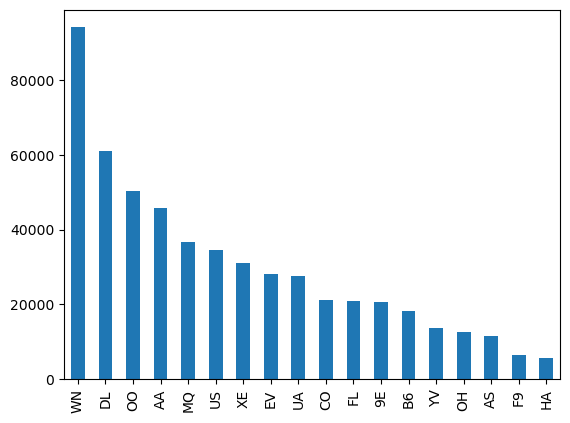

In [ ]:
df['Airline'].value_counts().plot(kind='bar')

<Axes: ylabel='Class'>

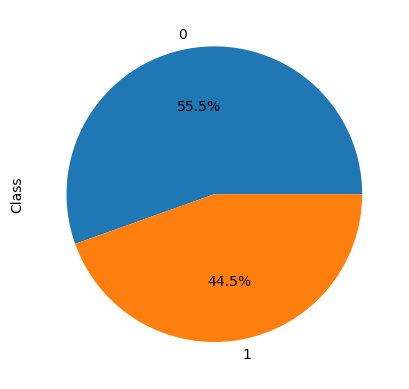

In [ ]:
df['Class'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='Airline', ylabel='DayOfWeek'>

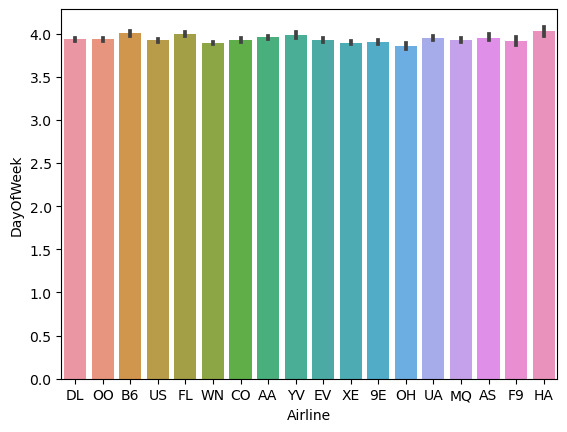

In [ ]:
import seaborn as sns
sns.barplot(data=df,x='Airline',y='DayOfWeek')

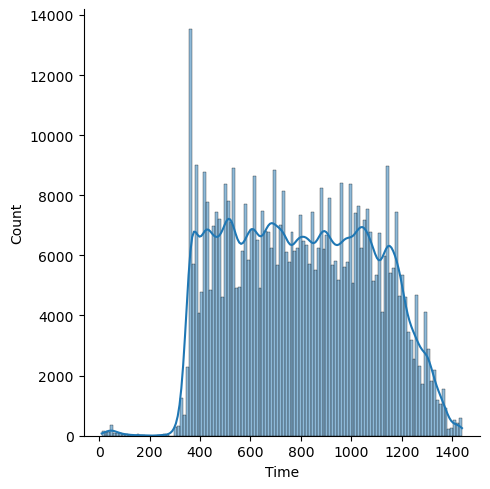

In [ ]:
sns.displot(df['Time'],kde=True)

In [ ]:
df.isnull().sum()

Time           0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

**Code for encoding**



In [ ]:

df = pd.get_dummies(df, columns = ['Airline', 'AirportFrom','AirportTo'])
print(df)

          Time  DayOfWeek  Class  Airline_9E  Airline_AA  Airline_AS  \
0       1296.0          1      0           0           0           0   
1        360.0          4      0           0           0           0   
2       1170.0          3      0           0           0           0   
3       1410.0          6      0           0           0           0   
4        692.0          4      0           0           0           0   
...        ...        ...    ...         ...         ...         ...   
539377   530.0          5      1           0           0           0   
539378   560.0          4      1           0           0           0   
539379   827.0          2      1           0           0           0   
539380   715.0          4      1           0           0           0   
539381   770.0          2      1           0           0           0   

        Airline_B6  Airline_CO  Airline_DL  Airline_EV  ...  AirportTo_TXK  \
0                0           0           1           0  .

In [ ]:
df

,Time,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1296.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,360.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1410.0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,692.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,530.0,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,560.0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,827.0,2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
539380,715.0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df.drop(columns='Class')
y=df['Class']

In [ ]:
len(df.columns)

607

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

In [ ]:
af_pca=pca.fit_transform(X)

In [ ]:
new_df=pd.DataFrame(data=af_pca)

In [ ]:
new_df

,0,1,2,3,4,5,6
0,-493.271873,-2.933723,-0.452510,0.942312,-0.067877,-0.219165,-0.032545
1,442.728183,0.074432,-0.203348,-0.421121,0.712669,-0.373501,-0.104930
2,-367.271813,-0.932249,-0.110978,-0.097659,-0.003862,0.254058,0.188601
3,-607.271854,2.065299,-0.064571,-0.130489,0.003273,0.511524,0.775931
4,110.728196,0.072283,-0.239537,0.265247,-0.024311,0.125373,-0.048254
...,...,...,...,...,...,...,...
539377,272.728137,1.073103,-0.142938,-0.307136,0.734841,-0.371669,0.071479
539378,242.728177,0.071003,0.901771,0.115540,0.074255,-0.142146,-0.014222
539379,-24.271767,-1.929668,-0.278640,0.315211,-0.029102,0.187256,-0.112330
539380,87.728157,0.069468,0.868721,0.159030,-0.056315,-0.052760,-0.039988


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 new_df, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape
X_test.shape

(107877, 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[39974 19740]
 [22619 25544]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65     59714
           1       0.56      0.53      0.55     48163

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
predictions = tree_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[56505  3209]
 [37271 10892]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.95      0.74     59714
           1       0.77      0.23      0.35     48163

    accuracy                           0.62    107877
   macro avg       0.69      0.59      0.54    107877
weighted avg       0.68      0.62      0.56    107877



In [ ]:
pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 61.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 73.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[47952 11762]
 [29597 18566]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70     59714
           1       0.61      0.39      0.47     48163

    accuracy                           0.62    107877
   macro avg       0.62      0.59      0.59    107877
weighted avg       0.62      0.62      0.60    107877

